In [ ]:
# Author Stefano Carrazza
# includes
import lhapdf
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.font_manager import FontProperties
import numpy as np
import math
import pylab

In [2]:
# define the correlation between 2 pdfs
def correlation(x, q, fl1, fl2, pdf, ind):
    nrep = len(ind)
    a = b = ab = sq_a = sq_b = 0.0
    for r in range(0,nrep):
        v1 = pdf[ind[r]].xfxQ(fl1, x, q)
        v2 = pdf[ind[r]].xfxQ(fl2, x, q)
        ab += v1*v2
        a  += v1
        b  += v2
        sq_a += v1*v1
        sq_b += v2*v2
    a /= nrep
    b /= nrep
    ab /= nrep
    sig1 = math.sqrt(sq_a/nrep - a*a)
    sig2 = math.sqrt(sq_b/nrep - b*b)
    
    return nrep/(nrep-1.0)*(ab-a*b)/(sig1*sig2)

In [3]:
# Loading the prior
pset = lhapdf.getPDFSet("1000rep")
prior = []
pindex = []
for i in range(0,pset.size): prior.append(pset.mkPDF(i))
for i in range(1,pset.size): pindex.append(i)

In [4]:
# Loading the compression
compressions = [10,20,30,40,50,60,70,80,90,100]
cindex = []
for i in range(len(compressions)):    
    f = open('replica_compression_' + str(compressions[i]) + '.dat')
    cindex.append([])
    for l in f.readlines():
        cindex[i].append(int(l))
    f.close()

/usr/lib/pymodules/python2.7/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


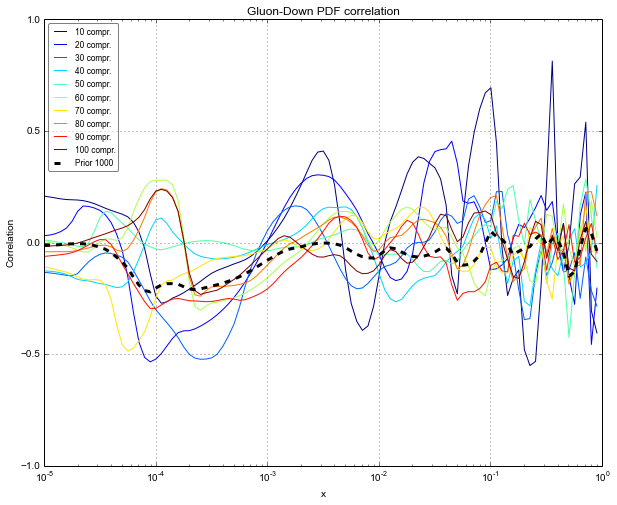

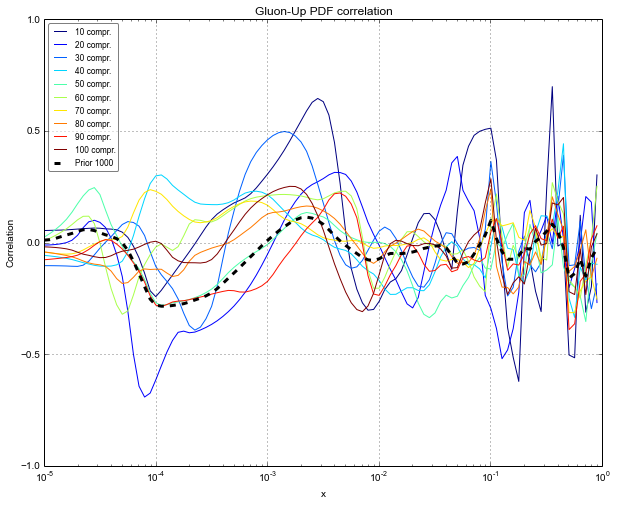

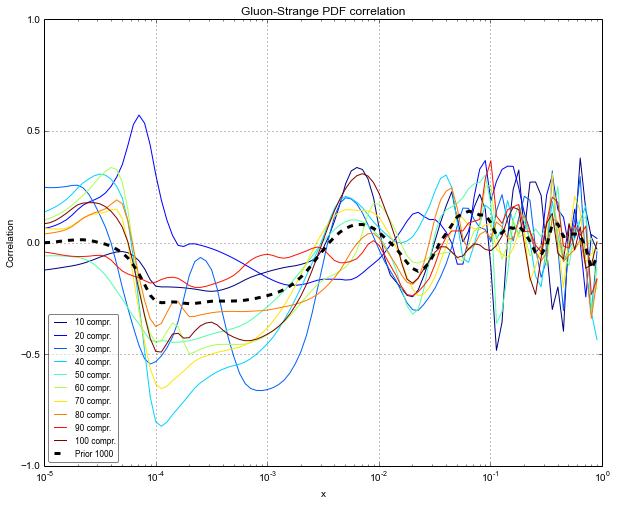

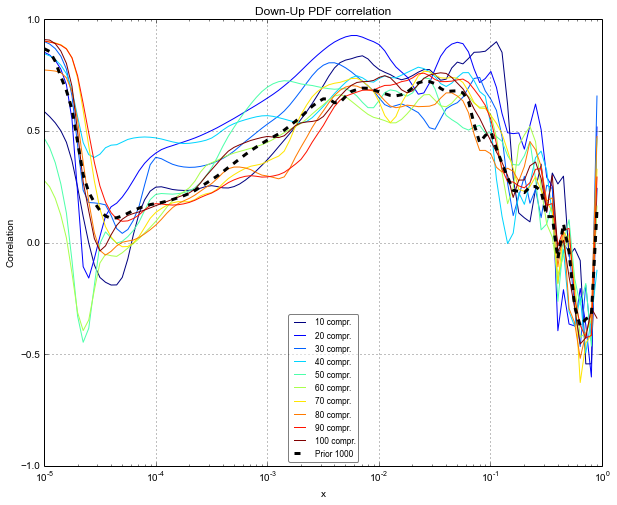

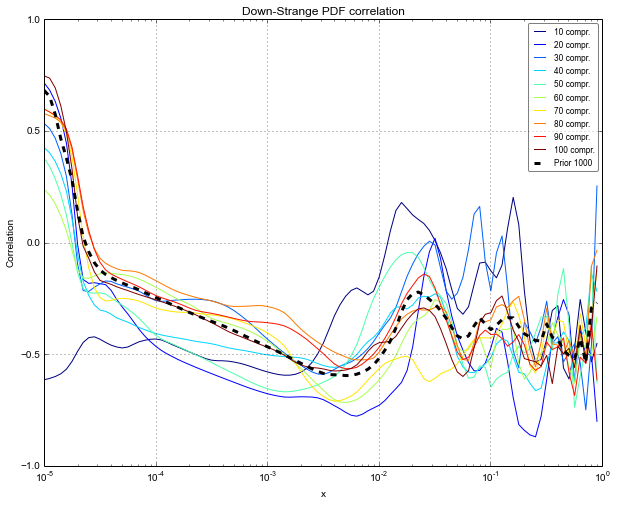

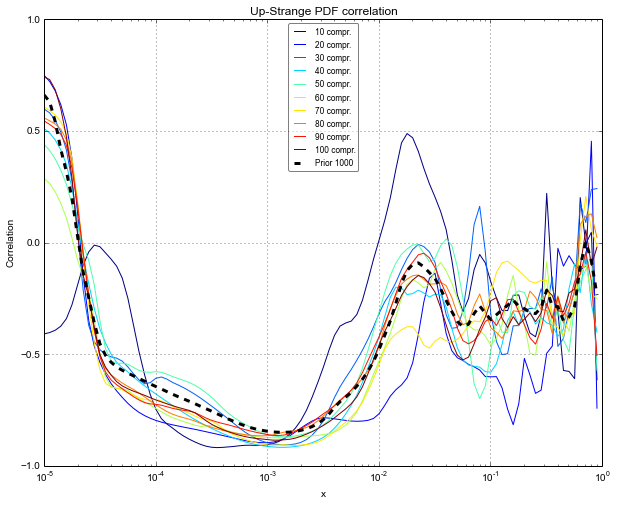

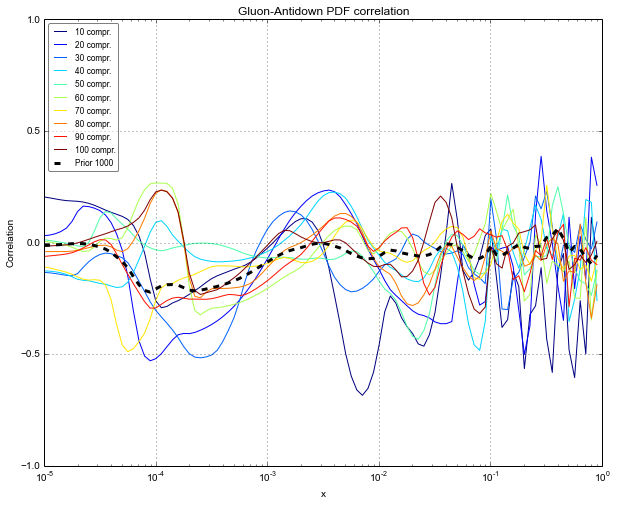

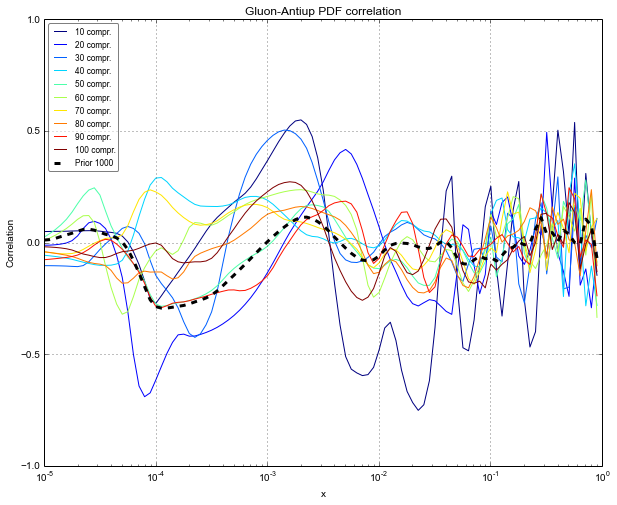

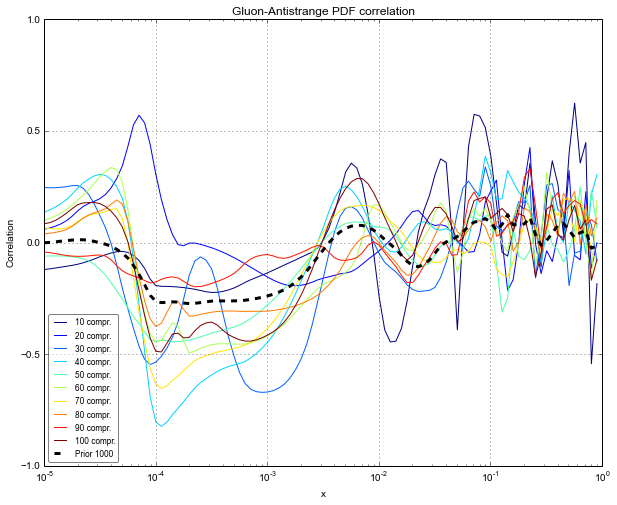

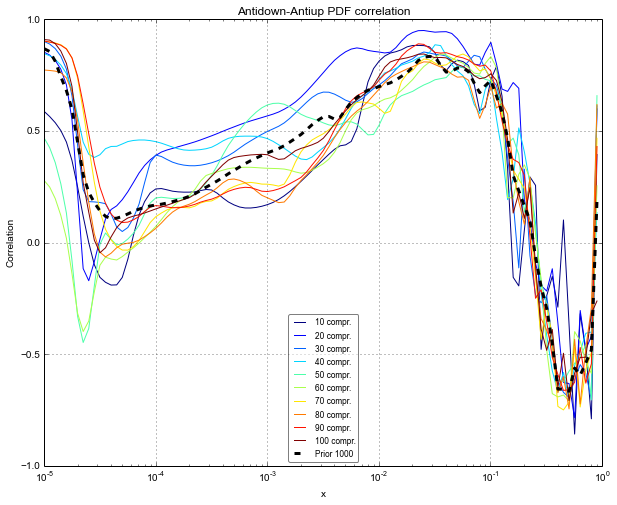

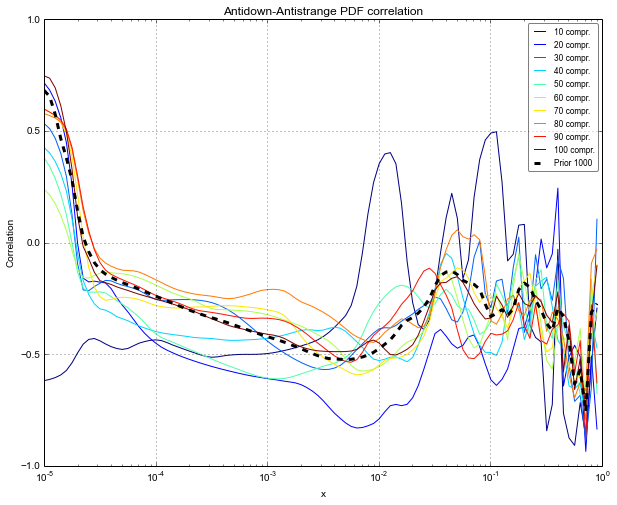

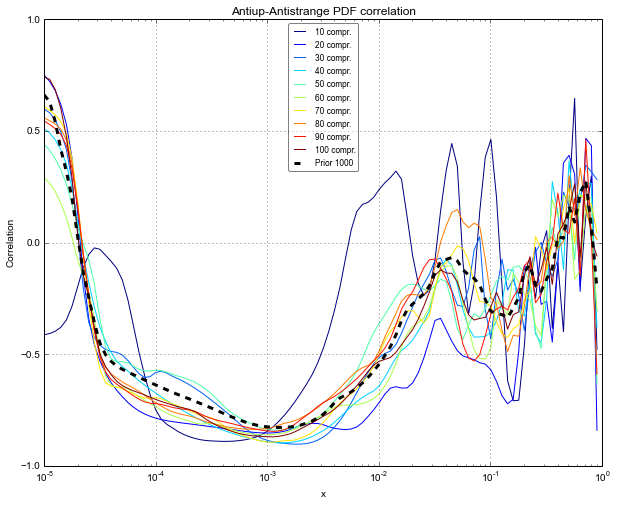

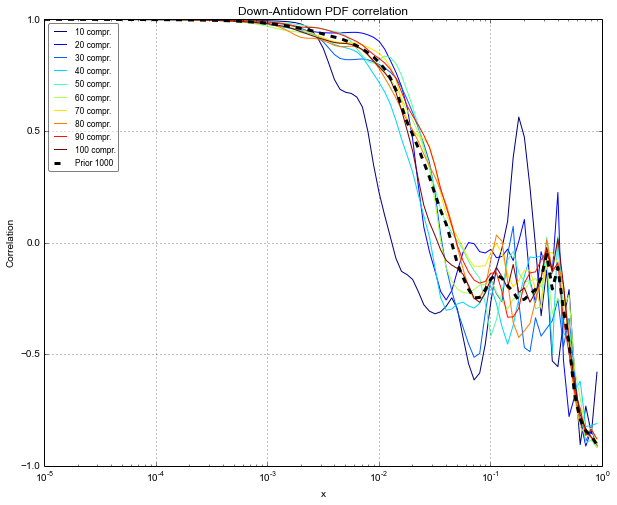

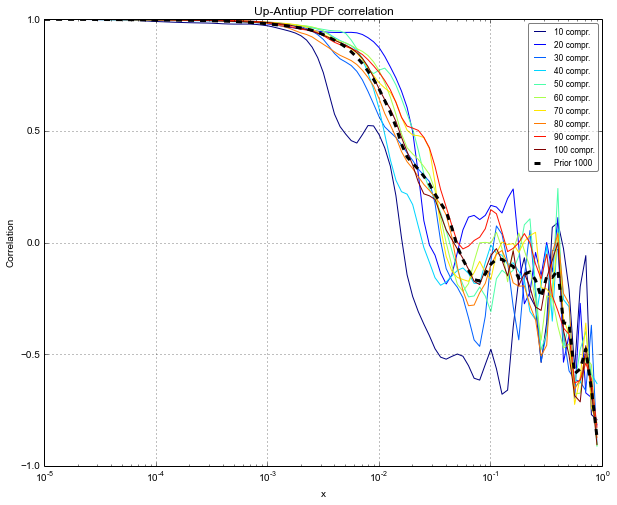

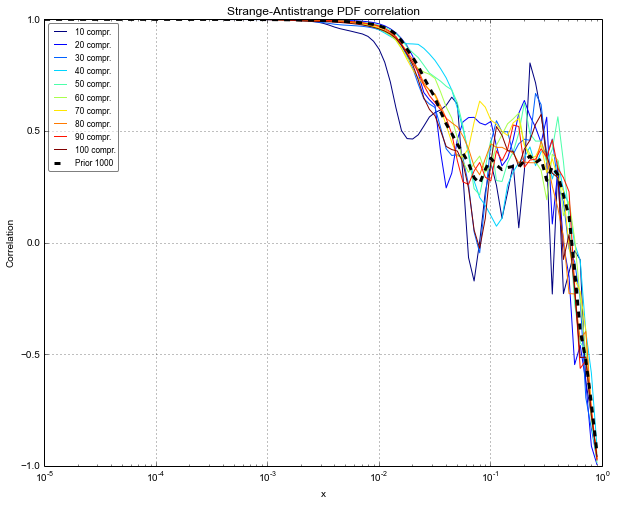

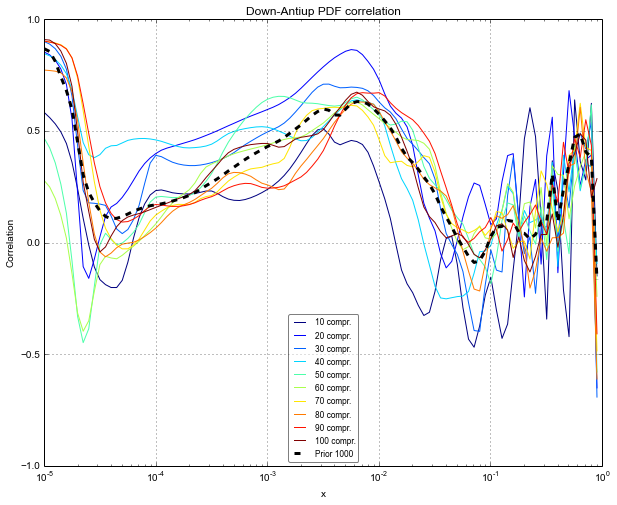

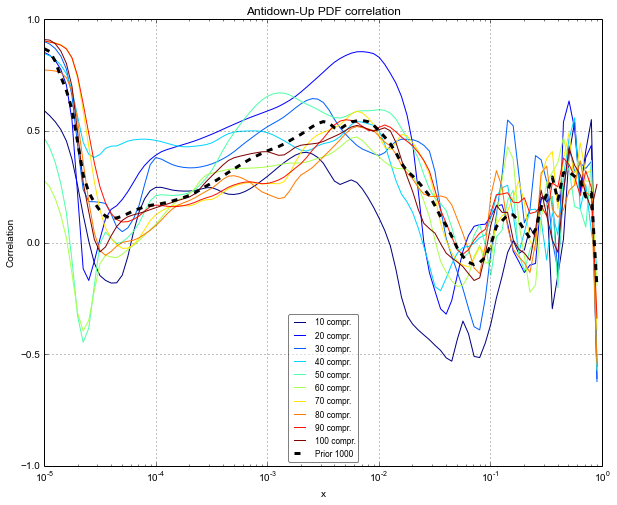

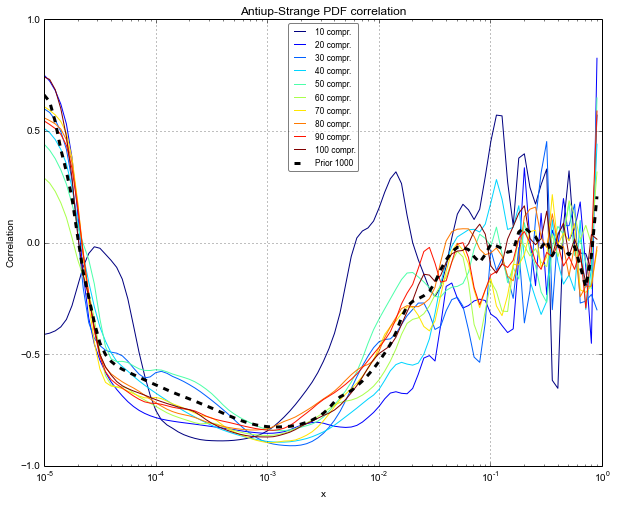

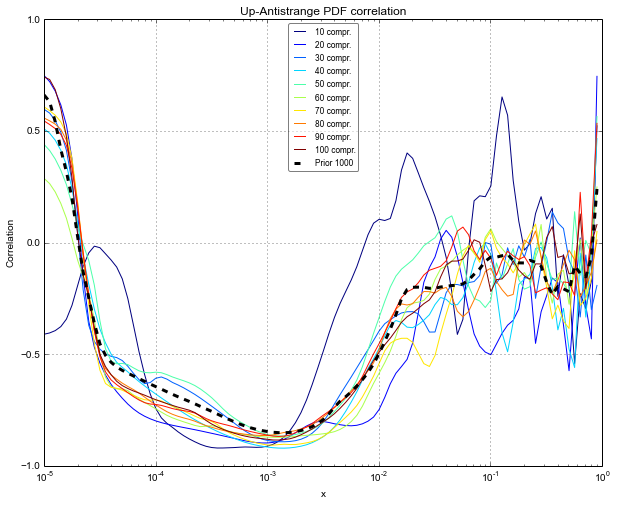

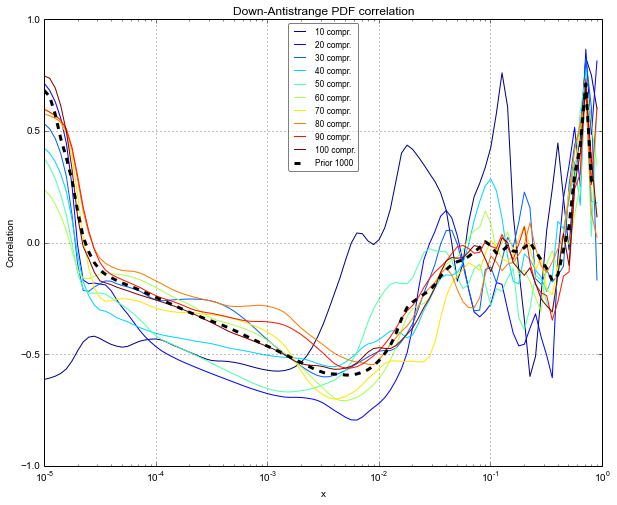

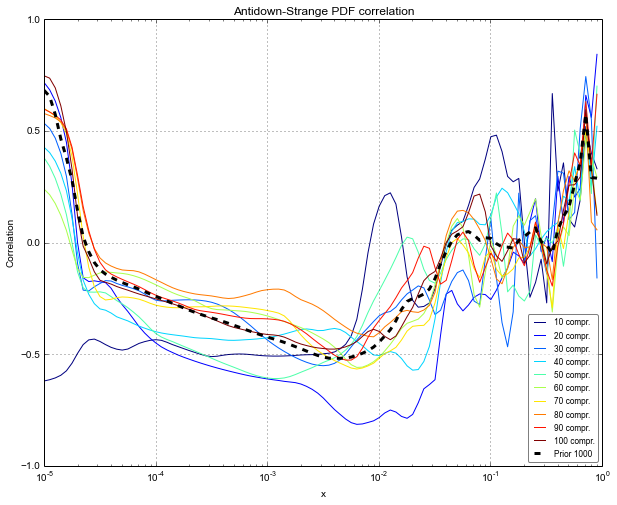

In [5]:
# plotting correlations
fls = [ [21,1], [21,2], [21,3], [1,2], [1,3], [2,3],
       [21,-1], [21,-2], [21,-3], [-1,-2], [-1,-3], [-2,-3],
       [1,-1], [2,-2], [3,-3], [1,-2], [-1,2], [-2,3], [2,-3], [1,-3], [-1,3] ] 
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

d = {21: "Gluon", 1: "Down", 2: "Up", 3: "Strange", -1: "Antidown", -2: "Antiup", -3: "Antistrange"}

# x points
x = np.logspace(math.log(1e-5), math.log(0.9), num=100, base=math.exp(1))
values = range(len(compressions))
jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
fontP = FontProperties()
fontP.set_size('small')

for fl in fls:
    plt.figure()
    y = np.empty(x.size)
    yc = []
    for i in range(0,x.size):
        y[i] = correlation(x[i], 1.0, fl[0], fl[1], prior, pindex)
    
    for i in range(len(compressions)):
        yc.append(np.empty(x.size))
        for j in range(0,x.size):
            yc[i][j] = correlation(x[j], 1.0, fl[0], fl[1], prior, cindex[i])
        
        colorVal = scalarMap.to_rgba(values[i])
        plt.plot(x,yc[i], color=colorVal, linewidth=1.0, label=str(compressions[i])+" compr.")
    
    plt.plot(x,y,'--',color='k', linewidth=3.0, label="Prior "+str(len(pindex)))

    #legend = plt.legend()
    legend = plt.legend(loc=0, fancybox=True, framealpha=0.5,prop = fontP)

    plt.xlabel('x')
    plt.ylabel('Correlation')
    plt.title(str(d[fl[0]])+"-"+str(d[fl[1]])+' PDF correlation')
    plt.xscale('log')
    plt.ylim([-1,1])
    plt.grid(True)          
    plt.savefig(str(d[fl[0]])+"-"+str(d[fl[1]])+'_correlation.png')